In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
datapath = '/home/ashao/data/'
tsdata = xr.open_mfdataset([ datapath+'woa18_decav_s00_01.nc', datapath+'woa18_decav_t00_01.nc'],decode_times=False)[ ['t_an','s_an']]
tsdata.load()

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 4326.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
Data variables:
    t_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...
    s_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : salinity Annual...
    summary:                         PRERELEASE Climatological mean salinity ...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the W

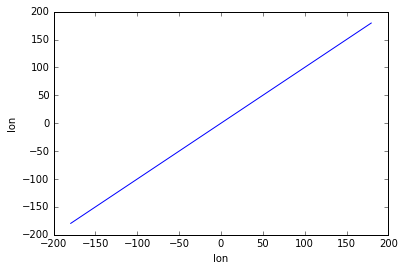

In [3]:
tsdata.lon.plot()

In [4]:
tsdata

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 4326.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
Data variables:
    t_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...
    s_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : salinity Annual...
    summary:                         PRERELEASE Climatological mean salinity ...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the W

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


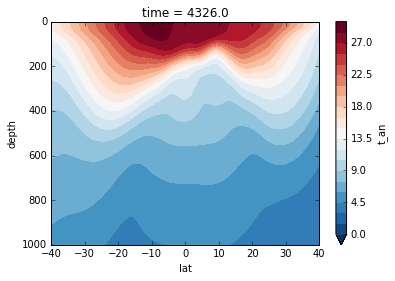

In [5]:
tsdata['t_an'][0,:,:,0:20].mean('lon').plot.contourf(levels=np.linspace(0,30,21));
plt.xlim(-40,40)
plt.ylim(0,1000)
plt.gca().invert_yaxis()


In [6]:
merid_t = tsdata['t_an'][0,:,:,0:20].mean('lon')
merid_s = tsdata['s_an'][0,:,:,0:20].mean('lon')

In [7]:
for lonidx in range(0,len(tsdata.lon)):
    tsdata['t_an'][:,:,:,lonidx] = merid_t.values
    tsdata['s_an'][:,:,:,lonidx] = merid_s.values

In [38]:
latidx_s = 40
latidx_n = 140
out = xr.merge( [tsdata['t_an'][:,:,latidx_s:latidx_n,0:20], tsdata['s_an'][:,:,latidx_s:latidx_n,0:4] ] )
out = xr.merge( [tsdata['t_an'], tsdata['s_an']])

In [39]:
out

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 4326.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
Data variables:
    t_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...
    s_an     (time, depth, lat, lon) float32 nan nan nan nan nan nan nan nan ...

In [40]:
out.to_netcdf('INPUT/pacific_meridional_temp_salt.nc')

/home/ashao/miniconda3/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [ ]:
out.to_netcdf?